# Import dataset

In [2]:
# import all modules that I'll use in this project
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# import data - train.csv here to build our model
data = pd.read_csv('./datasets/train.csv')
# import data - test.csv here to predict later for kaggle competition
data_to_pred = pd.read_csv('./datasets/test.csv')

In [4]:
data.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
data_to_pred.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [6]:
data.shape

(2051, 81)

In [7]:
data_to_pred.shape

(879, 80)

# Data Cleaning

### Clean the data used to build the model - train.csv

In [8]:
# change column names as all lower cases, fill all spaces with underscores
data.columns = data.columns.map(lambda x: x.replace(' ', '_'))
data.columns = data.columns.map(lambda x: x.lower())

In [9]:
# check number of nulls and %total in each column
# data.iloc[:,0:41].isnull().sum()
# data.iloc[:,0:41].isnull().mean()
data.iloc[:,41:81].isnull().sum()
data.iloc[:,41:81].isnull().mean()

# check data type of each column
# data.iloc[:,0:41].dtypes
data.iloc[:,41:81].dtypes

heating_qc          object
central_air         object
electrical          object
1st_flr_sf           int64
2nd_flr_sf           int64
low_qual_fin_sf      int64
gr_liv_area          int64
bsmt_full_bath     float64
bsmt_half_bath     float64
full_bath            int64
half_bath            int64
bedroom_abvgr        int64
kitchen_abvgr        int64
kitchen_qual        object
totrms_abvgrd        int64
functional          object
fireplaces           int64
fireplace_qu        object
garage_type         object
garage_yr_blt      float64
garage_finish       object
garage_cars        float64
garage_area        float64
garage_qual         object
garage_cond         object
paved_drive         object
wood_deck_sf         int64
open_porch_sf        int64
enclosed_porch       int64
3ssn_porch           int64
screen_porch         int64
pool_area            int64
pool_qc             object
fence               object
misc_feature        object
misc_val             int64
mo_sold              int64
y

In [10]:
# Clean data based on each cohort, eg. Lot, basement, garage etc.

# 1. Lot
# Put all lot related columns together
data[data['lot_frontage'].isnull()][['lot_frontage', 'lot_area', 'lot_shape', 'lot_config']]
# There is no 0 in lot_frontage
data[data['lot_frontage']==0]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice


In [11]:
# 2. Basement
# First, check bsmtfin_type_2 to see where is the missing value
data[data['bsmtfin_type_2'].isnull()][['id','bsmt_qual', 'bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_sf_1','bsmtfin_type_2']]

# Then, check bsmt_exposure to see the missing values; also check all other columns together
data[data['bsmt_exposure'].isnull()][['id','bsmt_qual', 'bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_sf_1','bsmtfin_type_2','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','bsmt_full_bath','bsmt_half_bath']]

# drop 3 rows with real missing values. id: 1797, 67, 2780, 445
data = data[~ data['id'].isin([1797, 67, 2780, 445])]

# change NA to 0 based on the details listed below
change_col_1342 = ['bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','bsmt_full_bath','bsmt_half_bath']
data.loc[data['id'] == 1342, change_col_1342] = 0
data.loc[data['id'] == 1498, ['bsmt_full_bath','bsmt_half_bath']] = 0


#### Details of Data Cleaning- PartA （A& B in total)

| Cohort         | column_name    | Type        | #missing_value | %missing_value | comments                                | actions                                                   |
|----------------|----------------|-------------|----------------|----------------|-----------------------------------------|-----------------------------------------------------------|
| Lot            | lot_frontage   | continuous  | 330            | 16.09          | missing value | ignore this column                                           |
| Alley          | alley          | categorical | 1911           | 93.17          | NA: No alley access                     | No action                                                 |
| Masonry veneer | mas_vnr_type   | categorical | 22             | 1.07           | missing values                          | No action                                                 |
| Masonry veneer | mas_vnr_area   | continuous  | 22             | 1.07           | missing values                          | No action                                                 |
| Basement       | bsmt_qual      | categorical | 55             | 2.68           | NA: No Basement                         | No action                                                 |
| Basement       | bsmt_cond      | categorical | 55             | 2.68           | NA: No Basement                         | No action                                                 |
| Basement       | bsmt_exposure  | categorical | 58             | 2.82           | 55 NA, 3 real missing values            | Droped row with those 3 missing values.id: 1797, 67, 2780 |
| Basement       | bsmtfin_type_1 | categorical | 55             | 2.68           | NA: No Basement                         | No action                                                 |
| Basement       | bsmtfin_sf_1   | continuous  | 1              | 0.04           | NA should be 0: no Basement             | Change NA to O, id: 1342                                  |
| Basement       | bsmtfin_type_2 | categorical | 56             | 2.73           | 1 real missing value                    | Drop row with this 1 missing value. id: 445               |
| Basement       | bsmtfin_sf_2   | continuous  | 1              | 0.04           | NA should be 0: no Basement             | Change NA to O, id: 1342                                  |
| Basement       | bsmt_unf_sf    | continuous  | 1              | 0.04           | NA should be 0: no Basement             | Change NA to O, id: 1342                                  |
| Basement       | total_bsmt_sf  | continuous  | 1              | 0.04           | NA should be 0: no Basement             | Change NA to O, id: 1342                                  |
| Basement       | bsmt_full_bath | Discrete    | 2              | 0.08           | NA should be 0: no Basement             | Change NA to 0, id: 1498 & 1342                           |
| Basement       | bsmt_half_bath | Discrete    | 2              | 0.08           | NA should be 0: no Basement             | Change NA to 0, id: 1498 & 1342                           |

In [12]:
# Then, check garage_yr_blt to see the missing values; also check all other garage columns together
data[data['garage_yr_blt'].isnull()][['id','garage_type','garage_yr_blt','garage_finish', 'garage_cars','garage_area','garage_qual','garage_cond']]

# drop 1 row with real missing values. id: 2237
data = data[~ data['id'].isin([2237])]

#### Details of Data Cleaning- PartB (A& B in total)

| Cohort    | column_name   | Type        | #missing_value | %missing_value | comments                  | actions                                      |
|-----------|---------------|-------------|----------------|----------------|---------------------------|----------------------------------------------|
| fireplace | fireplace_qu  | categorical | 999            | 48.8           | NA: no fireplace          | No action                                    |
| garage    | garage_type   | categorical | 113            | 5.52           | NA: no garage             | No action                                    |
| garage    | garage_yr_blt | discrete    | 114            | 5.57           | 113 no garages, 1 missing | Drop row with this 1 missing value. id: 2237 |
| garage    | garage_finish | categorical | 114            | 5.57           | 113 no garages, 1 missing | No action                                    |
| garage    | garage_cars   | discrete    | 1              | 0.04           | 1 missing                 | drop row with id 2237                        |
| garage    | garage_area   | continuous  | 1              | 0.04           | 1 missing                 | drop row with id 2237                        |
| garage    | garage_qual   | categorical | 114            | 5.57           | 113 no garages, 1 missing | drop row with id 2237                        |
| garage    | garage_cond   | categorical | 114            | 5.57           | 113 no garages, 1 missing | drop row with id 2237                        |
| pool      | pool_qc       | categorical | 2038           | 99.56          | NA: no pool               | No action                                    |
| fence     | fence         | categorical | 1647           | 80.46          | NA: no fence              | No action                                    |
| misc      | misc_feature  | categorical | 1982           | 96.82          | NA: no misc feature       | No action                                    |

In [13]:
data.shape

(2046, 81)

### Check what's in test dataset - test.csv

In [14]:
# change column names as all lower cases, fill all spaces with underscores
data_to_pred.columns = data_to_pred.columns.map(lambda x: x.replace(' ', '_'))
data_to_pred.columns = data_to_pred.columns.map(lambda x: x.lower())

In [15]:
# check number of nulls and %total in each column
# data_to_pred.iloc[:,0:41].isnull().sum()
# data_to_pred.iloc[:,0:41].isnull().mean()
# data_to_pred.iloc[:,41:81].isnull().sum()
data_to_pred.iloc[:,41:81].isnull().mean()

heating_qc         0.000000
central_air        0.000000
electrical         0.001138
1st_flr_sf         0.000000
2nd_flr_sf         0.000000
low_qual_fin_sf    0.000000
gr_liv_area        0.000000
bsmt_full_bath     0.000000
bsmt_half_bath     0.000000
full_bath          0.000000
half_bath          0.000000
bedroom_abvgr      0.000000
kitchen_abvgr      0.000000
kitchen_qual       0.000000
totrms_abvgrd      0.000000
functional         0.000000
fireplaces         0.000000
fireplace_qu       0.480091
garage_type        0.050057
garage_yr_blt      0.051195
garage_finish      0.051195
garage_cars        0.000000
garage_area        0.000000
garage_qual        0.051195
garage_cond        0.051195
paved_drive        0.000000
wood_deck_sf       0.000000
open_porch_sf      0.000000
enclosed_porch     0.000000
3ssn_porch         0.000000
screen_porch       0.000000
pool_area          0.000000
pool_qc            0.995449
fence              0.804323
misc_feature       0.953356
misc_val           0

| Cohort         | column_name    | Type        | #missing_value | %missing_value | comments                                 |
|----------------|----------------|-------------|----------------|----------------|------------------------------------------|
| Lot            | lot_frontage   | Continuous  | 160            | 18.20          | NA means no street passing by the house? |
| Alley          | alley          | Categorial  | 821            | 93.4           | NA：no alley access                      |
| Masonry Veneer | mas_vnr_type   | categorical | 1              | 0.11           | missing value                            |
| Masonry Veneer | mas_vnr_area   | categorical | 1              | 0.11           | missing value                            |
| Basement       | bsmt_qual      | categorical | 25             | 2.84           | NA: no basement                          |
| Basement       | bsmt_cond      | categorical | 25             | 2.84           | NA: no basement                          |
| Basement       | bsmt_exposure  | categorical | 25             | 2.84           | NA: no basement                          |
| Basement       | bsmtfin_type_1 | categorical | 25             | 2.84           | NA: no basement                          |
| Basement       | bsmtfin_type_2 | categorical | 25             | 2.84           | NA: no basement                          |
| Electrical     | electrical     | categorical | 1              | 0.11           | missing value                            |
| fireplace      | fireplace_qu   | categorical | 422            | 48             | NA: no fireplace                         |
| garage         | garage_type    | categorical | 44             | 5              | NA: no garage                            |
| garage         | garage_yr_blt  | discrete    | 45             | 5.11           | NA: no garage                            |
| garage         | garage_finish  | categorical | 45             | 5.11           | NA: no garage                            |
| garage         | garage_qual    | categorical | 45             | 5.11           | NA: no garage                            |
| garage         | garage_cond    | categorical | 45             | 5.11           | NA: no garage                            |
| pool           | pool_qc        | categorical | 875            | 99.54          | NA: no pool                              |
| fence          | fence          | categorical | 707            | 80.43          | NA: no fence                             |
| misc           | misc_feature   | categorical | 838            | 95.33          | NA: no misc feature                      |

In [16]:
# Since test dataset has missing value in lot_frontage, mas_vnr_type, mas_vnr_area, electrical. 
# I'll exclude these four.
data = data.loc[:, ~data.columns.isin(['lot_frontage','mas_vnr_type','mas_vnr_area','electrical'])]
data_to_pred = data_to_pred.loc[:, ~data_to_pred.columns.isin(['lot_frontage','mas_vnr_type','mas_vnr_area','electrical'])]

In [17]:
data.shape

(2046, 77)

In [18]:
data_to_pred.shape

(879, 76)

# EDA

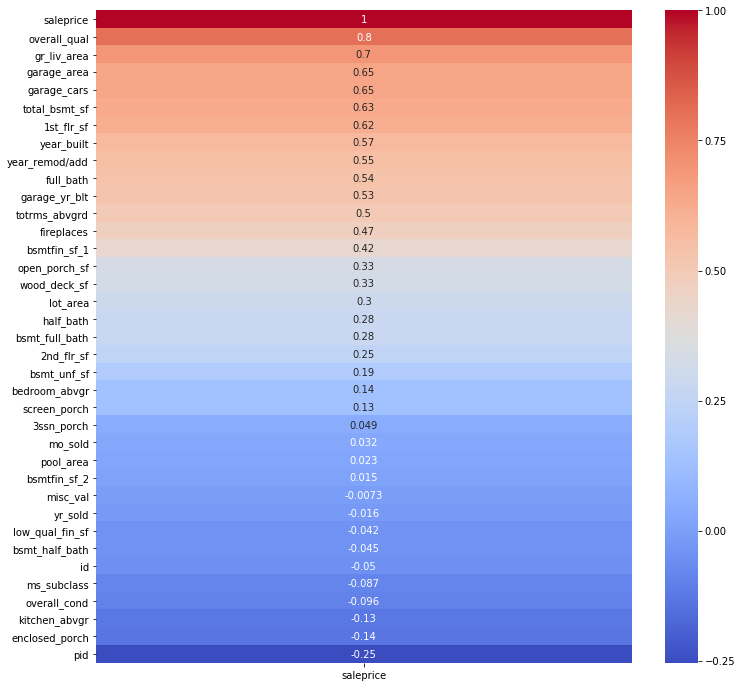

In [19]:
# check correlation of each numeric variables with saleprice
plt.figure(figsize = (12, 12))

sns.heatmap(data.corr()[['saleprice']].sort_values('saleprice', ascending=False), 
            cmap = 'coolwarm', 
            annot = True)

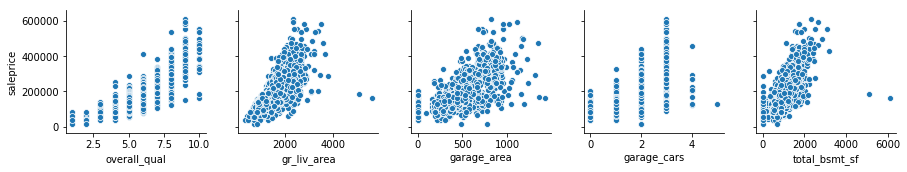

In [20]:
# use pairplot to check correlation of top numeric variables with saleprice
sns.pairplot(data,
             x_vars = ['overall_qual','gr_liv_area','garage_area','garage_cars','total_bsmt_sf'],
             y_vars = ['saleprice'])

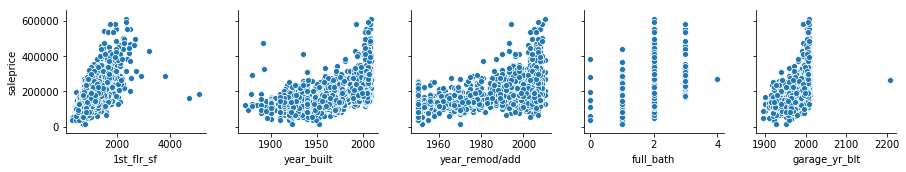

In [21]:
sns.pairplot(data,
             x_vars = ['1st_flr_sf','year_built','year_remod/add','full_bath','garage_yr_blt'],
             y_vars = ['saleprice'])

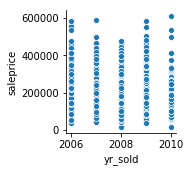

In [22]:
sns.pairplot(data,
             x_vars = ['yr_sold'],
             y_vars = ['saleprice'])

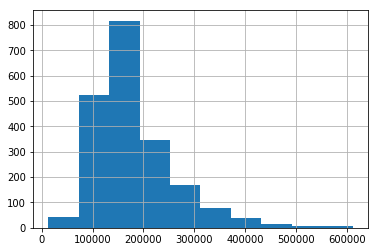

In [23]:
# check distribution of saleprice
data['saleprice'].hist()

In [24]:
# saleprice is right skewed, I'll use log(y) to build the model
data['log_saleprice'] =  np.log(data['saleprice'])

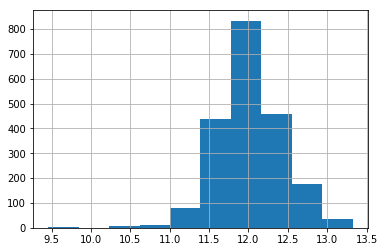

In [25]:
data['log_saleprice'].hist()

In [24]:
# save cleaned dataset
# use index=False to avoid "Unnamed:0" 
data.to_csv('./datasets/train_cleaned.csv', index=False)
data_to_pred.to_csv('./datasets/test_cleaned.csv', index=False)